In [125]:
from sklearn.datasets import load_iris
import numpy as np
import random
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Load Iris Data

In [51]:
data = load_iris()['data']

# Define Functions

In [59]:
def get_init_centr(k):
    centroids = random.sample(list(data),k)
    centroid_dict = defaultdict(list)
    for i in range(1,k+1):
        centroid_dict[i] = centroids[i-1]
    return centroid_dict
centroids = get_init_centr(10)

# Get Closest Centroid

In [53]:
def get_closest_cent(data, cent_dict):
    distances = [np.linalg.norm(data - value) for key, value in cent_dict.items()]
    return np.argsort(distances)[:-1][0]+1    
get_closest_cent(data[0],centroids)

9

# Assign Data Points

In [58]:
def assign_data_point(data, centroids):
    cluster_dict = defaultdict(list)
    for i, v in enumerate(data):
        cluster_dict[get_closest_cent(v,centroids)].append(i)
    return cluster_dict
cluster_dict = assign_data_point(data, centroids)

# Update Centroids

In [55]:
def update_cent(data, cluster_dict, centroid_dict):
    for k, v in centroid_dict.items():
        centroid_dict[k] = np.mean(np.array((data[cluster_dict[k][0:len(cluster_dict[k])]])),axis=0)
    return centroid_dict
update_cent(data, cluster_dict, centroids)

defaultdict(list,
            {1: array([6.73913043, 3.06956522, 5.67391304, 2.13913043]),
             2: array([5.55357143, 2.63214286, 3.95357143, 1.22142857]),
             3: array([5.35, 4.15, 1.45, 0.15]),
             4: array([5.65 , 4.025, 1.525, 0.325]),
             5: array([6.38, 2.64, 4.62, 1.39]),
             6: array([7.64285714, 3.22857143, 6.5       , 2.2       ]),
             7: array([6.2     , 2.934375, 4.928125, 1.715625]),
             8: array([5.4 , 3.7 , 1.4 , 0.25]),
             9: array([5.025     , 3.40357143, 1.525     , 0.25714286]),
             10: array([4.55833333, 3.075     , 1.31666667, 0.20833333])})

In [70]:
def k_means_iter(k, data, iterations):
    centroids = get_init_centr(k)
    for i in range(iterations):
        clusters = assign_data_point(data, centroids)
        centroids = update_cent(data, clusters, centroids)
    return clusters, centroids

In [116]:
#k_means(10, data, 5)

In [62]:
# def k_means_converge(k, data):
#     centroids = get_init_centr(k, data)
#     clusters = assign_data_point(data, centroids)
#     i=0
#     while centroids != update_cent(data, clusters, centroids):
#         clusters = assign_data_point(data, centroids)
#         centroids = update_cent(data, clusters, centroids)
#         i+=1
#     return clusters, centroids, i

In [71]:
def SSE(clusters, centroids, data):
    sse = 0
    for k,v in centroids.items():
        ind = clusters[k]
        sse = sse + sum([(np.linalg.norm(data[i] - v)**2) for i in ind])
    return sse

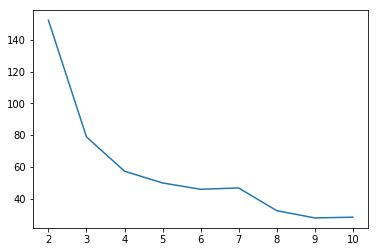

In [103]:
sil_output = []
sse_output = []
for i in range(2, 11):
    clusters, centroids = k_means_iter(i, data, 50)
    sse_output.append(SSE(clusters, centroids, data))
    
    labels = np.zeros(len(data))
    for k, v in clusters.items():
        labels[v] = k
    sil_output.append(metrics.silhouette_score(data, labels, metric='euclidean'))

plt.plot(range(2,11), sse_output)
plt.show()

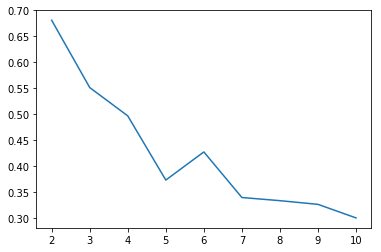

In [108]:
plt.plot(range(2,11), sil_output)
plt.show()

# Silhouette Score

In [77]:
metrics.silhouette_score(data, labels, metric='euclidean')

0.3104678342445383

# 2D Plots

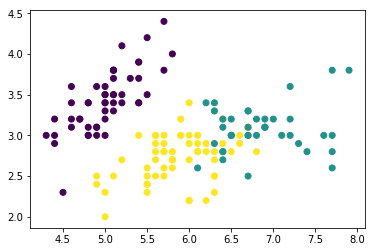

In [109]:
clusters, centroids = k_means_iter(3, data, 50)
labels = np.zeros(len(data))
for k, v in clusters.items():
    labels[v] = k
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

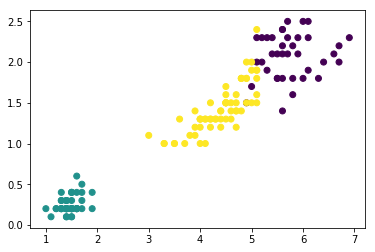

In [110]:
clusters, centroids = k_means_iter(3, data, 50)
labels = np.zeros(len(data))
for k, v in clusters.items():
    labels[v] = k
plt.scatter(data[:,2], data[:,3], c=labels)
plt.show()

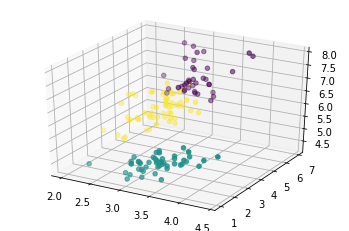

In [115]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data[:,0]
xdata = data[:,1]
ydata = data[:,2]
ax.scatter3D(data[:,1], data[:,2], data[:,0], c=labels)
plt.show()

In [142]:
def plot_clusters(data, centroids, clusters, iteration, display):
    if not display:
        return
    fig = plt.figure(figsize=(20,5))
    for i, v in enumerate(range(data.shape[1]), 3):
        ax = fig.add_subplot(1, 4, i+1, projection='3d')
        ax.view_init(35,45)
        ax.scatter(data[:,0], data[:,1], data[:,2])
        #ax.plot(clusters[:,0], clusters[:,1], clusters[:,2])
plt.show()

ValueError: num must be 1 <= num <= 4, not 5

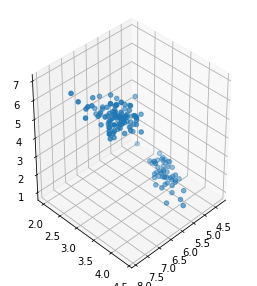

In [143]:
plot_clusters(data, centroids, clusters, 5, display)